# Name: Nancy Osama Ibrahim

## Prediction using Decision tree algorithm 

## task 6

In [218]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [219]:
df=pd.read_csv('Iris (1).csv')

In [220]:
df.drop('Id',inplace=True,axis=1)

In [221]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [222]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [223]:
#check for nukk values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [225]:
SpeciesEnc=LabelEncoder()

In [226]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global df
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [227]:
df['SpeciesENC']=ApplyEncoder(SpeciesEnc,'Species')

In [228]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesENC
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [229]:
x=df.drop('Species',axis=1)
y=df['SpeciesENC']

In [230]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesENC
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,shuffle = True , random_state = 44)

In [232]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 5), (38, 5), (112,), (38,))

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

In [234]:
model=DecisionTreeRegressor()

In [235]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

model.score(x_train,y_train)

In [236]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [238]:
y_pred = model.predict(x_test)
y_pred

array([2., 0., 1., 1., 2., 0., 2., 2., 2., 1., 0., 1., 0., 2., 0., 0., 2.,
       1., 0., 2., 1., 2., 2., 1., 2., 2., 0., 1., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0.])

### understand the Decision Tree


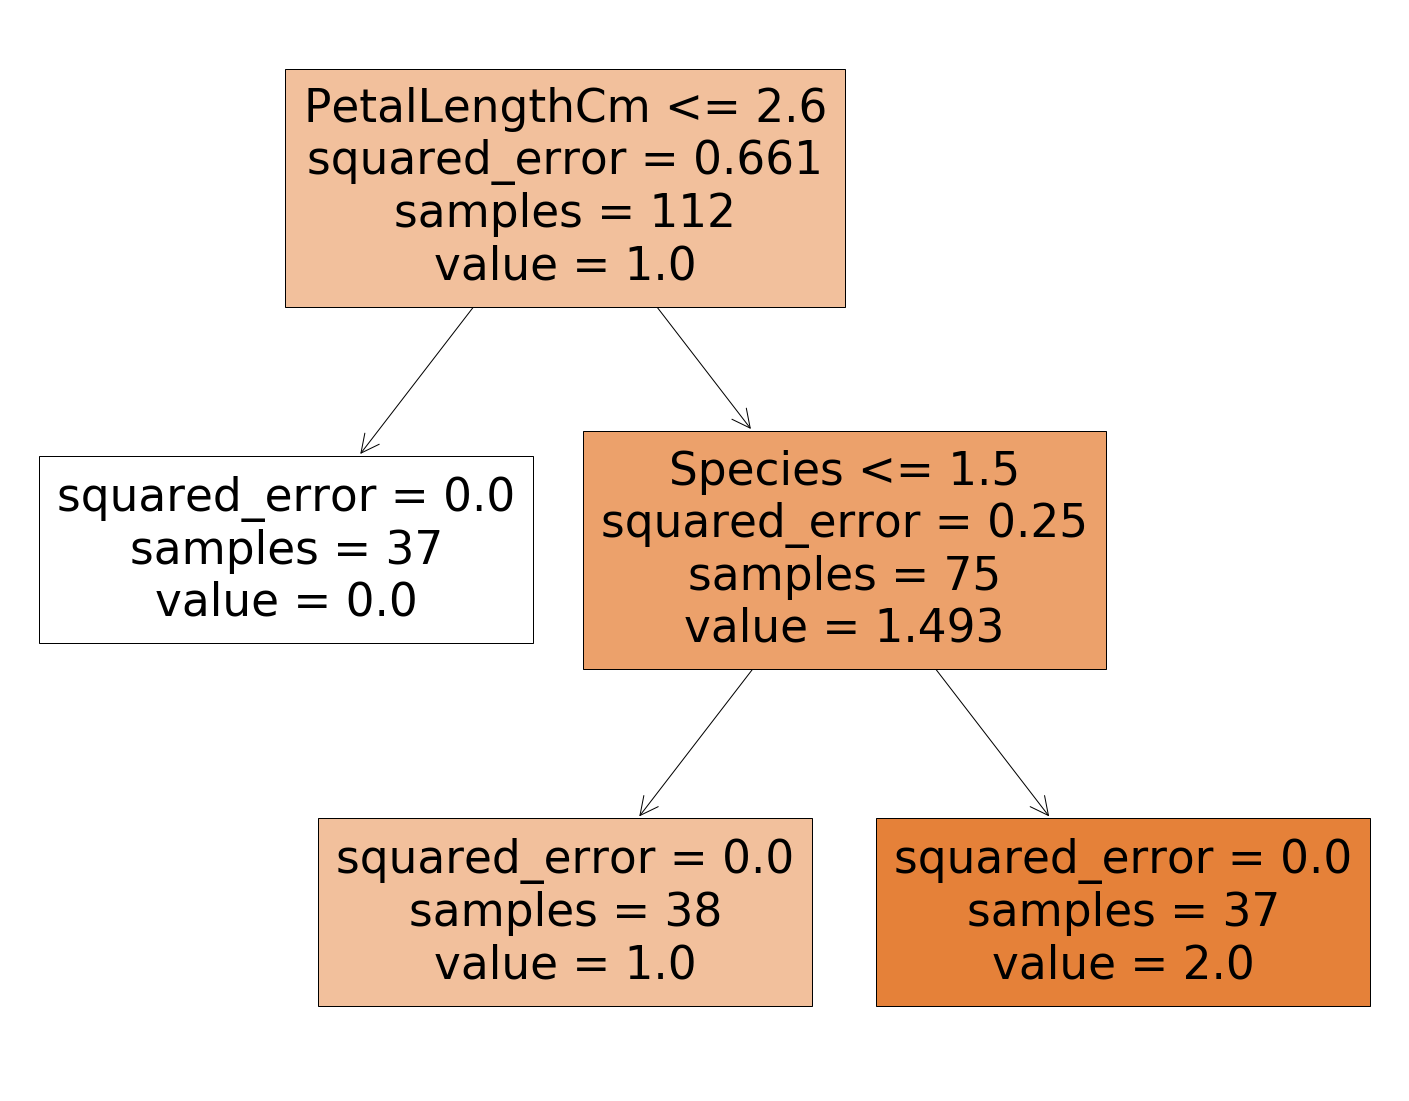

In [245]:
import matplotlib.pyplot as plt
ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                filled=True)
